# Import Libraries

In [1]:
#data processing
import pandas as pd
import numpy as np
import missingno
from collections import Counter

In [2]:
#Machine learning models 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier



In [3]:
#model evaluation and hyperparameter tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [4]:
#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import warnings 
warnings.filterwarnings('ignore')

# Data processing

In [6]:
test=pd.read_csv('../input/titanic/test.csv')
train=pd.read_csv('../input/titanic/train.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
print("Shape of training data : ",train.shape)
print("Shape of testing data : ",test.shape)


Shape of training data :  (891, 12)
Shape of testing data :  (418, 11)


# Data Analysis

## Detecting Missing Data

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
train.isnull().sum().sort_values(ascending= False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [13]:
test.isnull().sum().sort_values(ascending= False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

<AxesSubplot:>

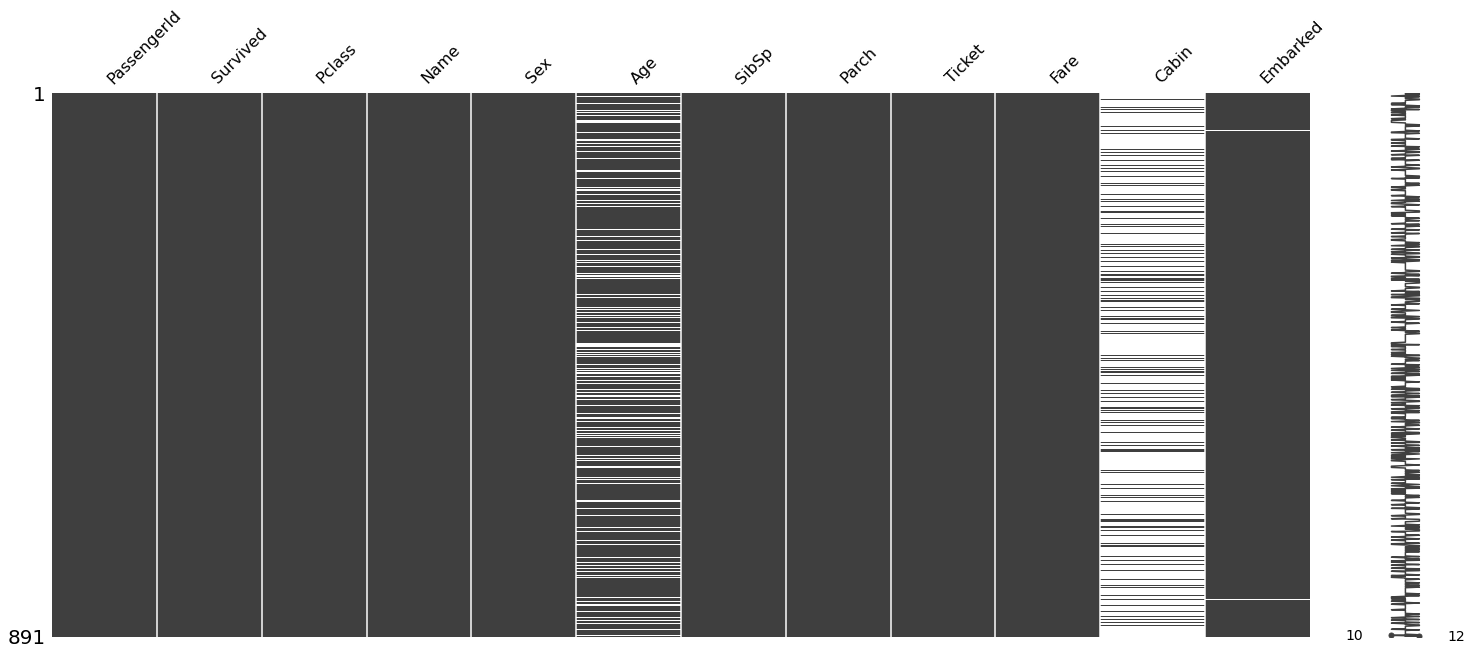

In [14]:
missingno.matrix(train)

<AxesSubplot:>

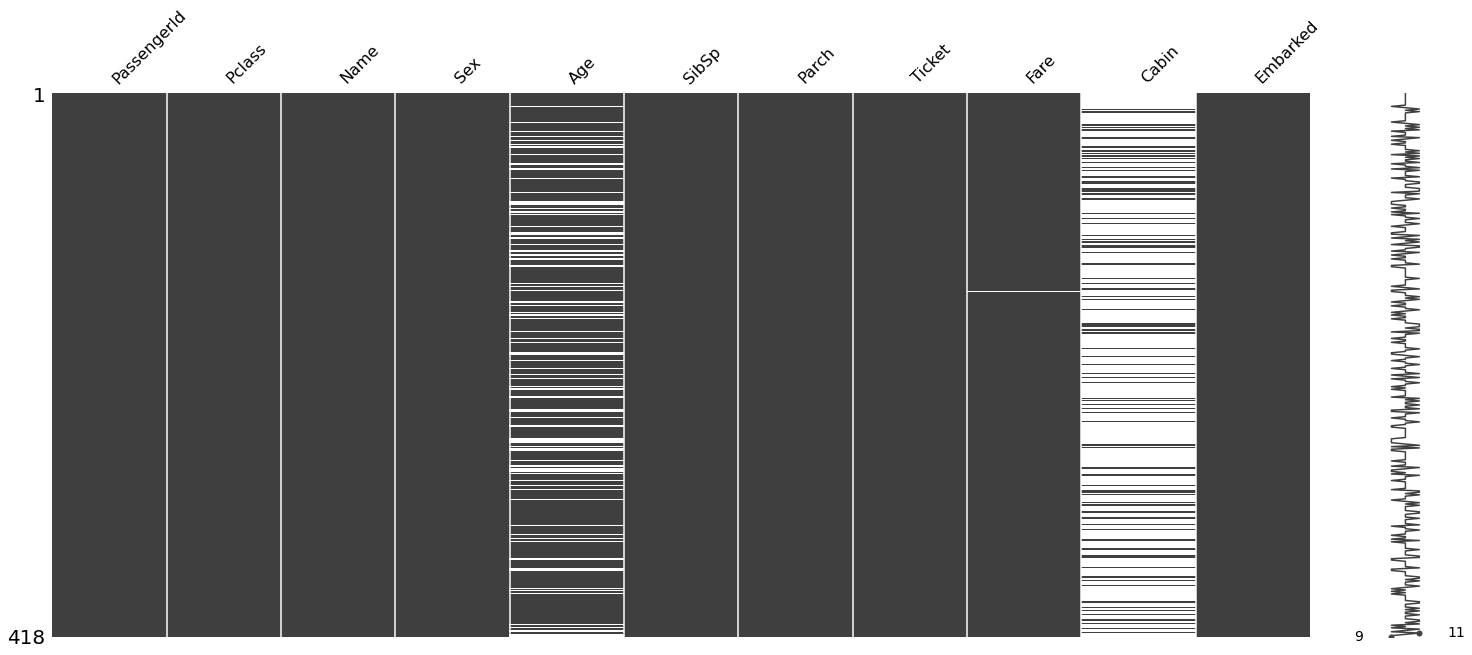

In [15]:
missingno.matrix(test)

In [16]:
train[['Sex','Survived']].groupby('Sex',as_index= False).mean().sort_values(by= 'Survived',ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Gender Based Survival')

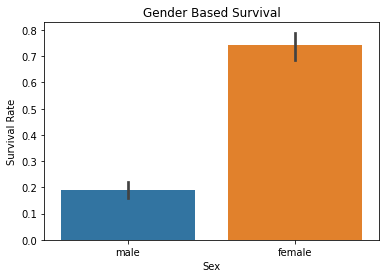

In [17]:
sns.barplot(x='Sex',y='Survived',data = train)
plt.ylabel('Survival Rate')
plt.title ('Gender Based Survival')

In [18]:
train[['Pclass','Survived']].groupby('Pclass',as_index= False).mean().sort_values(by= 'Survived',ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Class Based Survival')

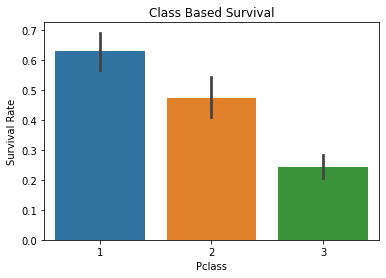

In [19]:
sns.barplot(x='Pclass',y= 'Survived' ,data = train)
plt.ylabel('Survival Rate')
plt.title ('Class Based Survival')

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

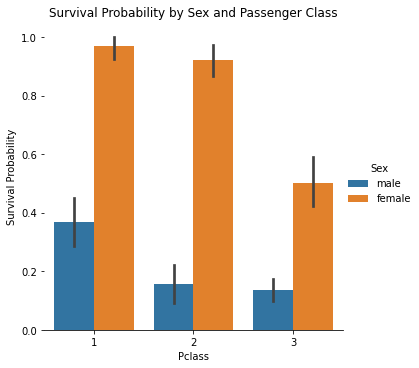

In [20]:
plot =sns.factorplot(x = 'Pclass' , y = 'Survived', hue= 'Sex' , data= train, kind= 'bar')
plot.despine(left=True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

In [21]:
train[['Embarked','Survived']].groupby('Embarked',as_index= False).mean().sort_values(by= 'Survived',ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Class Based Survival')

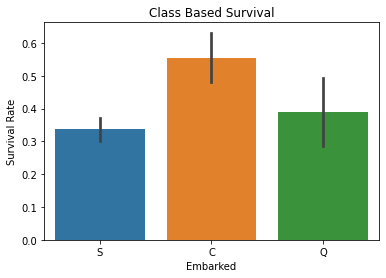

In [22]:
sns.barplot(x='Embarked',y= 'Survived' ,data = train)
plt.ylabel('Survival Rate')
plt.title ('Class Based Survival')

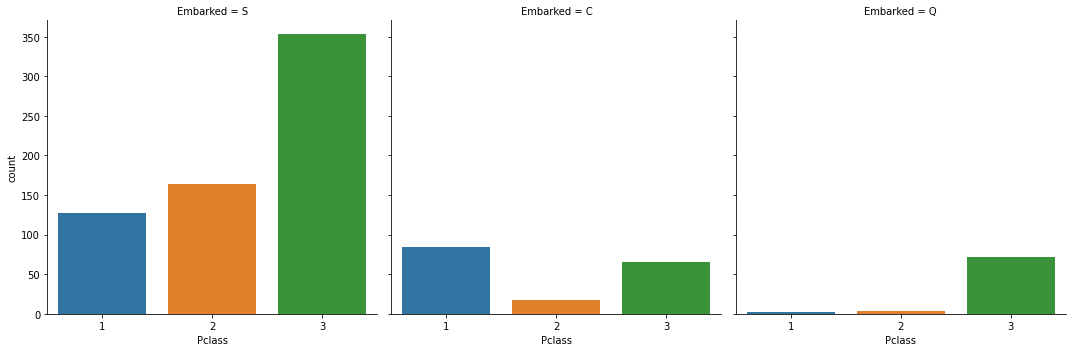

In [23]:
sns.factorplot('Pclass', col = 'Embarked',data = train, kind = 'count')

# Handling Outliers 

In [24]:
def outliers(data, n, specs):
    out_i=[]
    for col in specs:
        quar1=np.percentile(data[col],25)
        quar3=np.percentile(data[col],75)
        quar=quar3-quar1
        outlier_step = 1.5 * quar 
        outlier_list_col = data[(data[col] < quar1 - outlier_step) | (data[col] > quar3 + outlier_step)].index
        out_i.extend(outlier_list_col) 
    out_i = Counter(out_i)
    multiple_outliers = list(key for key, value in out_i.items() if value > n) 
    return multiple_outliers
outliers_to_drop = outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
outliers_to_drop
        
    

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [25]:
print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


# Correlation

<AxesSubplot:>

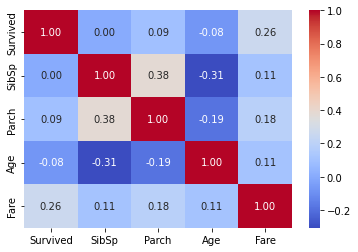

In [26]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

In [27]:
train[['SibSp','Survived']].groupby('SibSp',as_index= False).mean().sort_values(by= 'Survived',ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

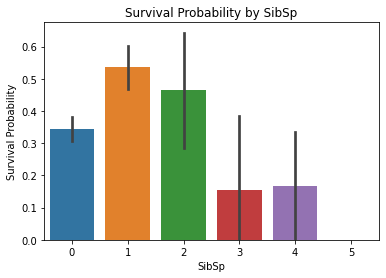

In [28]:
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

In [29]:
train[['Parch','Survived']].groupby('Parch', as_index = False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

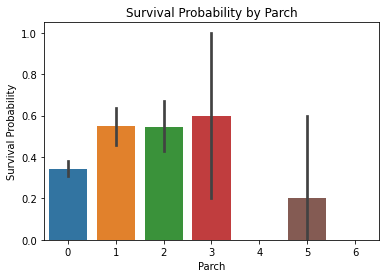

In [30]:
sns.barplot(x='Parch',y='Survived',data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

# Graphical Representation of Skewness

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


Text(0.5, 1.0, 'Passenger Age Distribution')

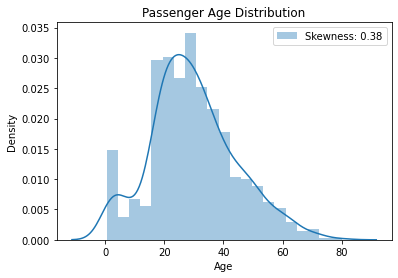

In [32]:
sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

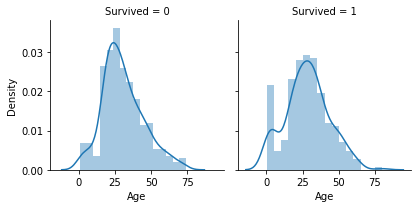

In [33]:
g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

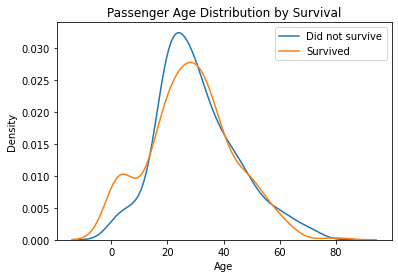

In [34]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.legend()
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

Text(0, 0.5, 'Passenger Fare Distribution')

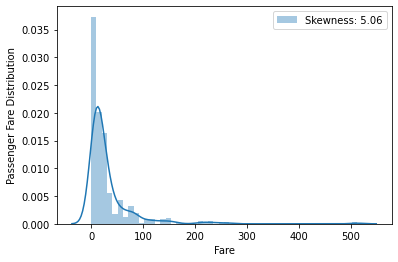

In [35]:
sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

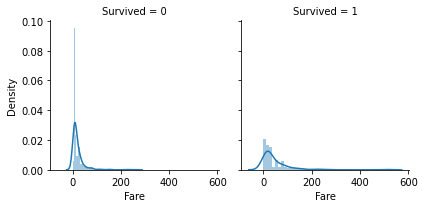

In [36]:
g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Fare')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

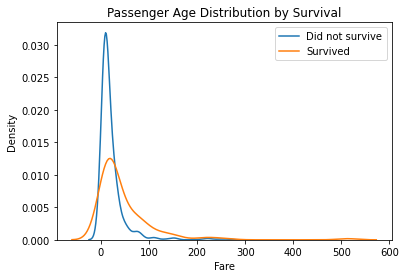

In [37]:
sns.kdeplot(train['Fare'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Fare'][train['Survived'] == 1], label = 'Survived')
plt.legend()
plt.xlabel('Fare')
plt.title('Passenger Age Distribution by Survival')

# Processing Data

### Drop and Fill the missing values

In [38]:
train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

In [39]:
#MISSING VALUES
train.isnull().sum().sort_values(ascending = False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [40]:
#FILLING MISSING VALUES WITH MOST COMMON VALUES
mode = train['Embarked'].dropna().mode()[0]
train['Embarked'].fillna(mode, inplace = True)


In [41]:
#TEST DATA
test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [42]:

median = test['Fare'].dropna().median()
test['Fare'].fillna(median, inplace = True)

### Now we are combining data to fill missing values to obtain best result

In [43]:
combine = pd.concat([train, test], axis = 0).reset_index(drop = True)

In [44]:
# Missing values in the combined dataset

combine.isnull().sum().sort_values(ascending = False)

Survived       418
Age            256
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

#### Encoding gender: male-> 1 & female-> 0

In [45]:
combine['Sex'] = combine['Sex'].map({'male': 1, 'female': 0})

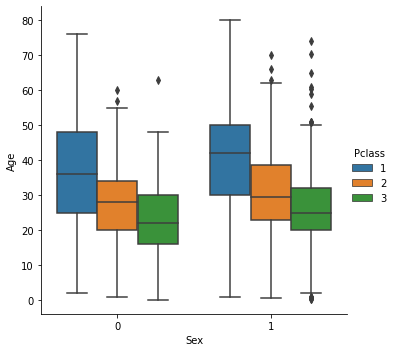

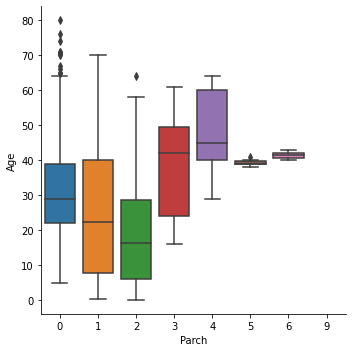

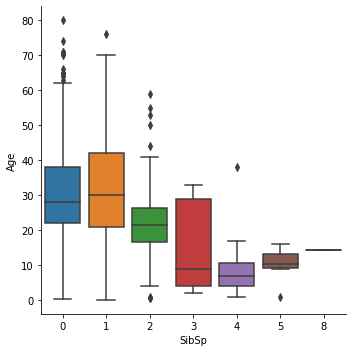

In [46]:
sns.factorplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'box', data = combine)
sns.factorplot(y = 'Age', x = 'Parch', kind = 'box', data = combine)
sns.factorplot(y = 'Age', x = 'SibSp', kind = 'box', data = combine)

<AxesSubplot:>

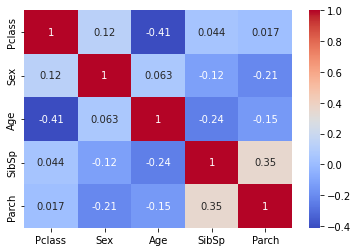

In [47]:
sns.heatmap(combine.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis = 1).corr(), annot = True, cmap = 'coolwarm')

We can see in the heat map that age is negatively correlated to SibSp, Parch and Pclass

In [48]:
# Check number of missing ages 

miss_age = list(combine[combine['Age'].isnull()].index)
len(miss_age)

256

We fill the missing age with median of rows having same SibSp , Parch, Pclass values.

In [49]:
for index in miss_age:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) 
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        combine['Age'].iloc[index] = predict_age

In [50]:
combine['Age'].isnull().sum()

0

# Transforming the data

Text(0.5, 1.0, 'Passenger Fare Distribution')

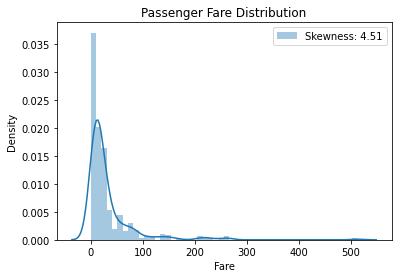

In [51]:
#Fare distribution

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [52]:
# Apply log transformation to Fare column to reduce skewness

combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

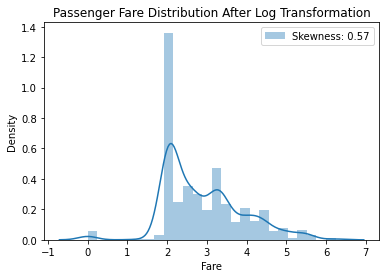

In [53]:
sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

In [54]:
combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [55]:
combine['Title'].nunique()

18

In [56]:
# Simplify title

combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

<AxesSubplot:xlabel='Title', ylabel='count'>

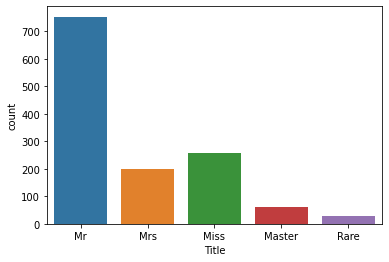

In [57]:
sns.countplot(combine['Title'])

In [58]:
combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


Text(0.5, 1.0, 'Mean of survival by Title')

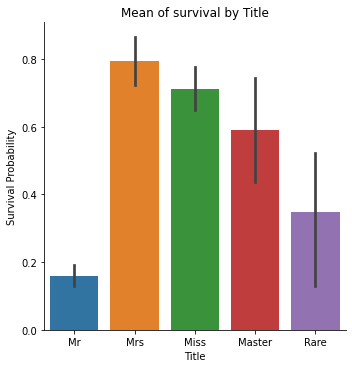

In [59]:
sns.factorplot(x = 'Title', y = 'Survived', data = combine, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [60]:
combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,1,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,0,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,0,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,0,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,1,35.0,0,0,2.085672,S,Mr


In [61]:
#Calculating family
combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [62]:
# Mean of survival by family size

combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived',ascending =False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [63]:
combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1
# Mean of survival by IsAlone

combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by='Survived',ascending=False)

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [64]:
# Drop SibSp, Parch and FamilySize features from combine dataframe

combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,1,22.0,1.981001,S,Mr,0
1,2,1.0,1,0,38.0,4.266662,C,Mrs,0
2,3,1.0,3,0,26.0,2.070022,S,Miss,1
3,4,1.0,1,0,35.0,3.972177,S,Mrs,0
4,5,0.0,3,1,35.0,2.085672,S,Mr,1


In [65]:
# Create age range and compute mean of survival by age bands

combine['AgeRange'] = pd.cut(combine['Age'], 5)
combine[['AgeRange', 'Survived']].groupby('AgeRange', as_index=False).mean().sort_values(by='Survived',ascending=False)

,AgeRange,Survived
0,"(0.0902, 16.136]",0.532110
3,"(48.068, 64.034]",0.434783
2,"(32.102, 48.068]",0.412844
1,"(16.136, 32.102]",0.339662
4,"(64.034, 80.0]",0.090909


In [66]:
# Assign ordinals to each age range

combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [67]:
# Drop age range feature

combine = combine.drop('AgeRange', axis = 1)


In [68]:
combine['Age'] = combine['Age'].astype('int')

In [69]:
combine['Agecode'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Agecode']].head()

,Age,Pclass,Agecode
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


# Encoding

In [70]:
# Encode Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Agecode,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,1,1,1.981001,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,0,2,4.266662,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,0,1,2.070022,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,0,2,3.972177,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,1,2,2.085672,1,6,0,0,1,0,0,0,0,1


In [71]:
# Divide Fare into four range

combine['FareRange'] = pd.cut(combine['Fare'], 4)
combine[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,FareRange,Survived
3,"(4.679, 6.239]",0.750000
2,"(3.119, 4.679]",0.517007
1,"(1.56, 3.119]",0.288719
0,"(-0.00624, 1.56]",0.062500


In [72]:
# Assigning ordinal to each fare range

combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [73]:
combine['Fare'] = combine['Fare'].astype('int')

In [74]:
combine = combine.drop('FareRange', axis = 1)

In [75]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Agecode,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,1,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,0,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,0,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,0,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,1,2,1,1,6,0,0,1,0,0,0,0,1


In [76]:
traind = combine[:len(train)]
testd = combine[len(train):]

In [77]:
traind = traind.drop('PassengerId', axis = 1)

In [78]:
traind['Survived'] = traind['Survived'].astype('int')

In [79]:
testd = testd.drop('Survived', axis = 1)

# Splitting Data and Training Model

In [80]:
X_train = traind.drop('Survived', axis = 1)
Y_train = traind['Survived']
X_test = testd.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 14)
Y_train shape:  (881,)
X_test shape:  (418, 14)


In [81]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred_y=lr.predict(X_test)
acc_lr=round(lr.score(X_train,Y_train)*100,2)
acc_lr

80.93

In [82]:
#SVM
svm =SVC()
svm.fit(X_train, Y_train)
pred_y= svm.predict(X_test)
acc_svm= round(svm.score(X_train, Y_train)*100,2)
acc_svm

83.09

In [83]:
#K-nearest neighbours (KNN)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
pred_y = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.79

In [84]:
#Gaussian naive bayes
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_train, Y_train) * 100, 2)
acc_gnb

79.11

In [85]:
#Perceptron
percep = Perceptron()
percep.fit(X_train, Y_train)
pred_y = percep.predict(X_test)
acc_percep = round(percep.score(X_train, Y_train) * 100, 2)
acc_percep

57.43

In [86]:
#Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
pred_y = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.25

In [87]:
#Stochastic gradient descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
pred_y = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

80.25

In [88]:
#Decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.7

In [89]:
#Random forest
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.7

# Accuracy Comparision

In [90]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree'],
                       'Score': [acc_svm, acc_knn, acc_lr, acc_random_forest, acc_gnb, acc_percep,
                                 acc_sgd, acc_linear_svc, acc_decision_tree]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,85.70
1,Decision Tree,85.70
2,KNN,84.79
3,Support Vector Machines,83.09
4,Logistic Regression,80.93
5,Stochastic Gradient Decent,80.25
6,Linear SVC,80.25
7,Naive Bayes,79.11
8,Perceptron,57.43


# K fold Cross Validaton

In [91]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())

len(classifiers)

9

In [92]:

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 9))


# Classifier cross validation

In [93]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [94]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.825221,0.036674,Support Vector Machines
1,0.818419,0.035790,KNN
2,0.803656,0.037999,Random Forest
3,0.801389,0.033221,Linear SVC
4,0.796842,0.032307,Logistic Regression
5,0.795708,0.038072,Decision Tree
6,0.787760,0.036140,Gausian Naive Bayes
7,0.784370,0.037533,Perceptron
8,0.770730,0.042705,Stochastic Gradient Descent


Text(0.5, 1.0, 'Cross Validation Scores')

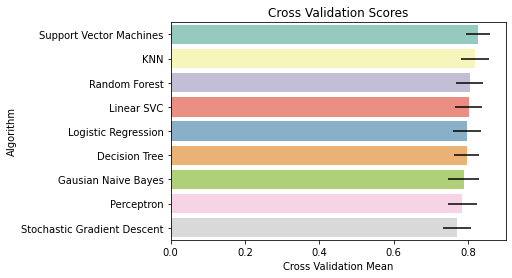

In [95]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

# Hyperparameter tuning for SVM

In [96]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.718 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [97]:
# Training accuracy

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.54

In [98]:
# Mean cross validation score

cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.8297242083758938

In [99]:
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Preparing data for submission

In [100]:
submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})


In [101]:
submit.to_csv('submission.csv',index=False)